In [1]:
cd /s/project/gene2bird/groupA

/data/ceph/hdd/project/node_05/gene2bird/groupA


In [18]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    balanced_accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_folder = "data"
results_folder = "predictions"

os.makedirs(results_folder, exist_ok=True)


In [7]:
pwd

'/data/ceph/hdd/project/node_05/gene2bird/groupA'

In [8]:
# Get the list of CSV files in the data folder
csv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]

for csv_file in csv_files:
    # Read the CSV file
    csv_path = os.path.join(data_folder, csv_file)
    df = pd.read_csv(csv_path)

    features = df.iloc[:, :-1]
    target = df['label']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=2000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(class_weight='balanced'),
        'MLP': MLPClassifier(hidden_layer_sizes=(256, 128), activation='relu', random_state=42)
    }

    trained_models = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[model_name] = model

    results = {}
    metrics = {
        'Accuracy': accuracy_score,
        'Balanced accuracy': balanced_accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1-score': f1_score,
        'AUC-ROC': roc_auc_score
    }

    for model_name, model in trained_models.items():
        y_pred = model.predict(X_test)
        model_metrics = {}
        for metric_name, metric_func in metrics.items():
            score = metric_func(y_test, y_pred)
            model_metrics[metric_name] = score
        results[model_name] = model_metrics

        cm = confusion_matrix(y_test, y_pred)
        plt.figure()
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')

        # Save the plot under the results folder with the same CSV file name
        plot_filename = os.path.splitext(csv_file)[0] + f"_{model_name}_confusion_matrix.png"
        plot_path = os.path.join(results_folder, plot_filename)
        plt.savefig(plot_path)
        plt.close()

    metrics_names = list(metrics.keys())
    model_names = list(results.keys())

    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    for model_name in model_names:
        scores = list(results[model_name].values())
        sns.lineplot(x=metrics_names, y=scores, marker='o', label=model_name)

    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Comparison of Model Performances')

    # Save the plot under the results folder with the same CSV file name
    plot_filename = os.path.splitext(csv_file)[0] + "_model_performance.png"
    plot_path = os.path.join(results_folder, plot_filename)
    plt.savefig(plot_path)
    plt.close()


/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter

In [16]:
"""import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import seaborn as sns

# Set the paths for the data and results folders
data_folder = "data"
results_folder = "results"

# Create the results folder if it doesn't exist
os.makedirs(results_folder, exist_ok=True)

# Get the list of CSV files in the data folder
csv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]

# Select the genes for comparison
selected_genes = ['gene1', 'gene2', 'gene3']

for csv_file in csv_files:
    # Read the CSV file
    csv_path = os.path.join(data_folder, csv_file)
    df = pd.read_csv(csv_path)

    # Filter the DataFrame to include only the selected genes
    selected_df = df[selected_genes + ['label']]

    # Perform the data analysis and model training
    count_ones = selected_df['label'].value_counts().get(1, 0)
    print("Number of 1s in the label column:", count_ones)

    features = selected_df.iloc[:, :-1]
    target = selected_df['label']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=2000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(class_weight='balanced'),
        'MLP': MLPClassifier(hidden_layer_sizes=(256, 128), activation='relu', random_state=42)
    }

    trained_models = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[model_name] = model

    results = {}
    metrics = {
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1-score': f1_score,
        'AUC-ROC': roc_auc_score
    }

    for model_name, model in trained_models.items():
        y_pred = model.predict(X_test)
        model_metrics = {}
        for metric_name, metric_func in metrics.items():
            score = metric_func(y_test, y_pred)
            model_metrics[metric_name] = score
        results[model_name] = model_metrics

        cm = confusion_matrix(y_test, y_pred)
        plt.figure()
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')

        # Save the plot under the results folder with the same CSV file name and gene names
        plot_filename = os.path.splitext(csv_file)[0] + f"_{model_name}_confusion_matrix.png"
        plot_path = os.path.join(results_folder, plot_filename)
        plt.savefig(plot_path)
        plt.close()

    metrics_names = list(metrics.keys())
    model_names = list(results.keys())

    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    for model_name in model_names:
        scores = list(results[model_name].values())
        sns.lineplot(x=metrics_names, y=scores, marker='o', label=model_name)

    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Comparison of Model Performances')

    # Save the plot under the results folder with the same CSV file name and gene names
    plot_filename = os.path.splitext(csv_file)[0] + "_model_performance.png"
    plot_path = os.path.join(results_folder, plot_filename)
    plt.savefig(plot_path)
    plt.close()"""


'import os\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import (\n    accuracy_score,\n    precision_score,\n    recall_score,\n    f1_score,\n    roc_auc_score,\n    confusion_matrix,\n)\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Set the paths for the data and results folders\ndata_folder = "data"\nresults_folder = "results"\n\n# Create the results folder if it doesn\'t exist\nos.makedirs(results_folder, exist_ok=True)\n\n# Get the list of CSV files in the data folder\ncsv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]\n\n# Select the genes for comparison\nselected_genes = [\'gene1\', \'gene2\', \'gene3\']\n\nfor csv_file in csv_files:\n    # Read the CSV file\n    csv_path = os.path.join(data_fo

CORIN enzyme.csv
Number of 1s in the label column: 187


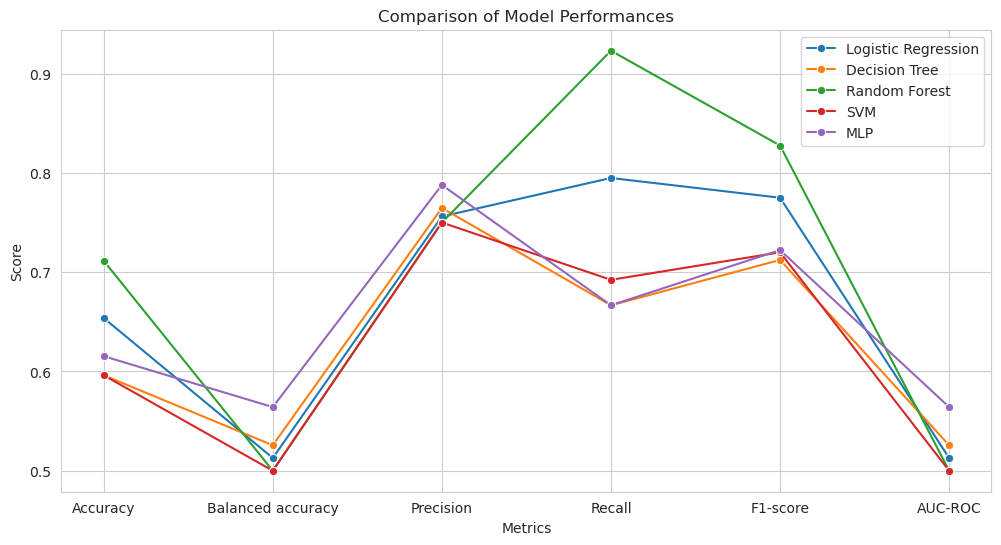

SFRP1 protein.csv
Number of 1s in the label column: 151


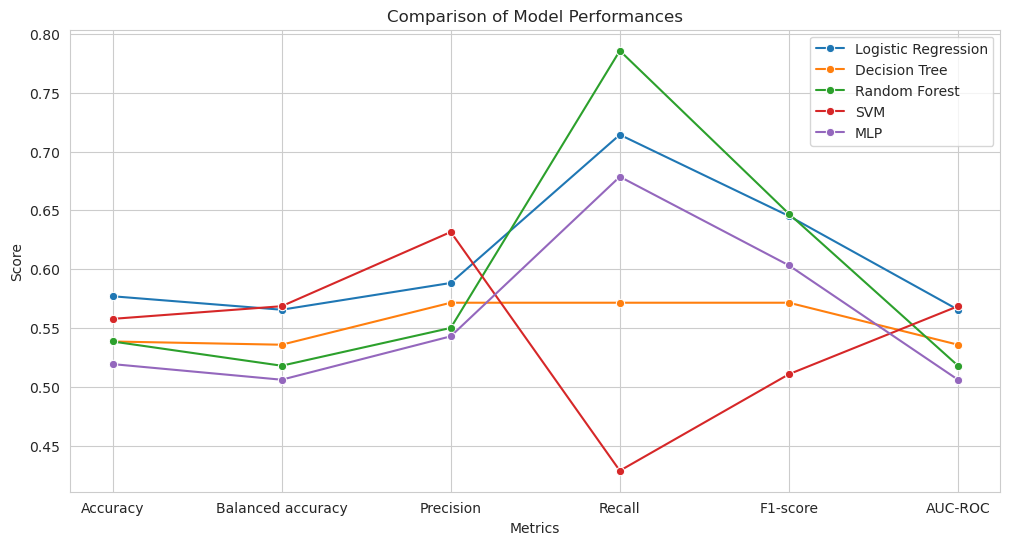

CLCN7 protein.csv
Number of 1s in the label column: 170


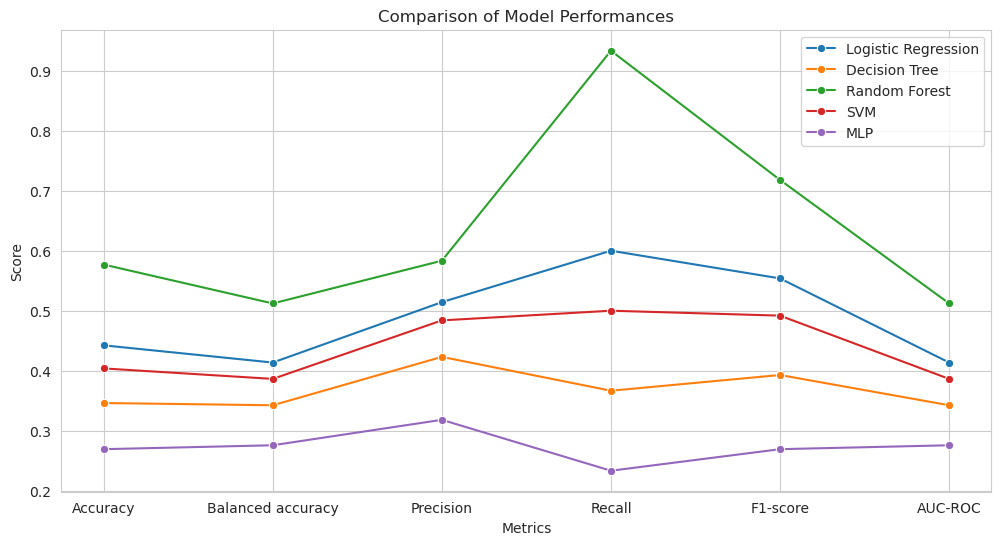

ATP7A ATPase.csv
Number of 1s in the label column: 198


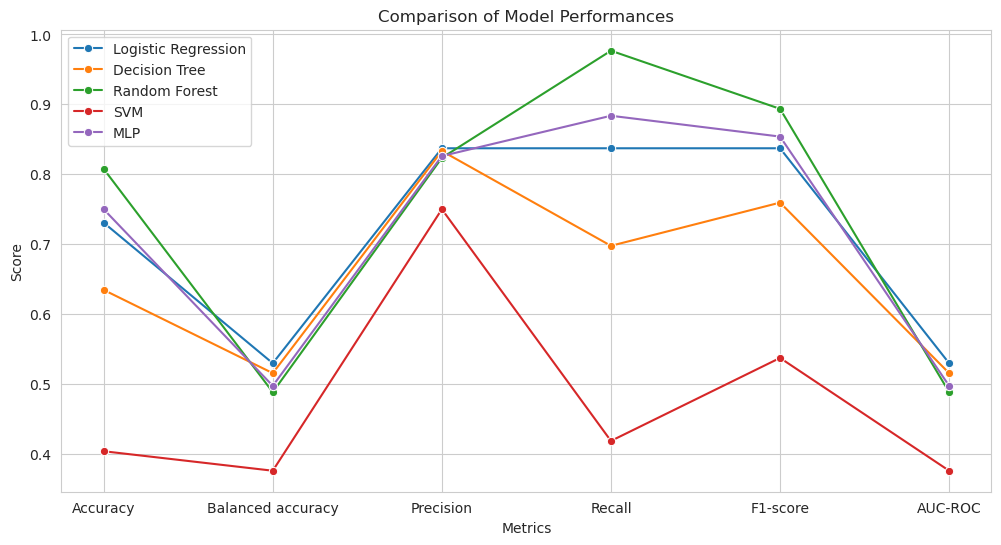

NR4A3 protein.csv
Number of 1s in the label column: 206


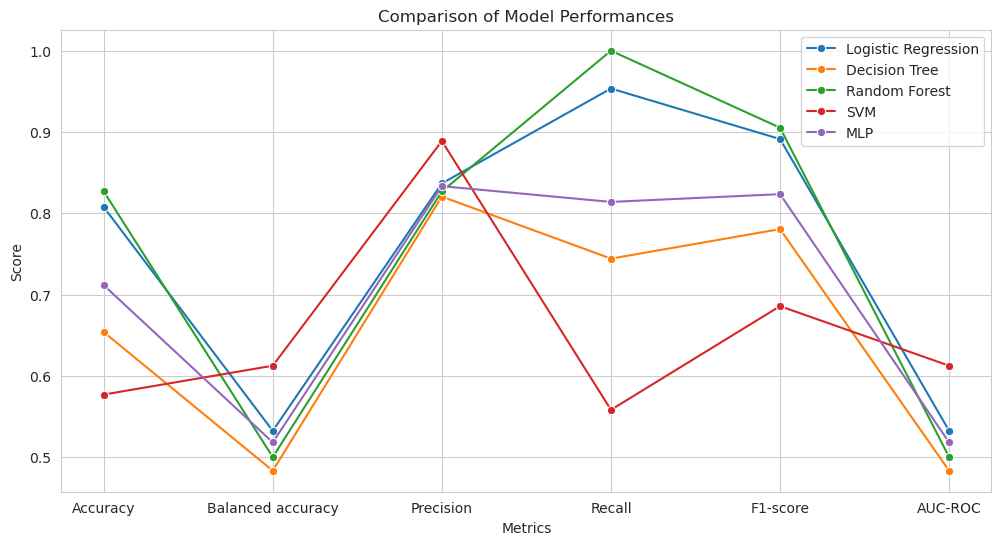

HPGDS synthase.csv
Number of 1s in the label column: 190


/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


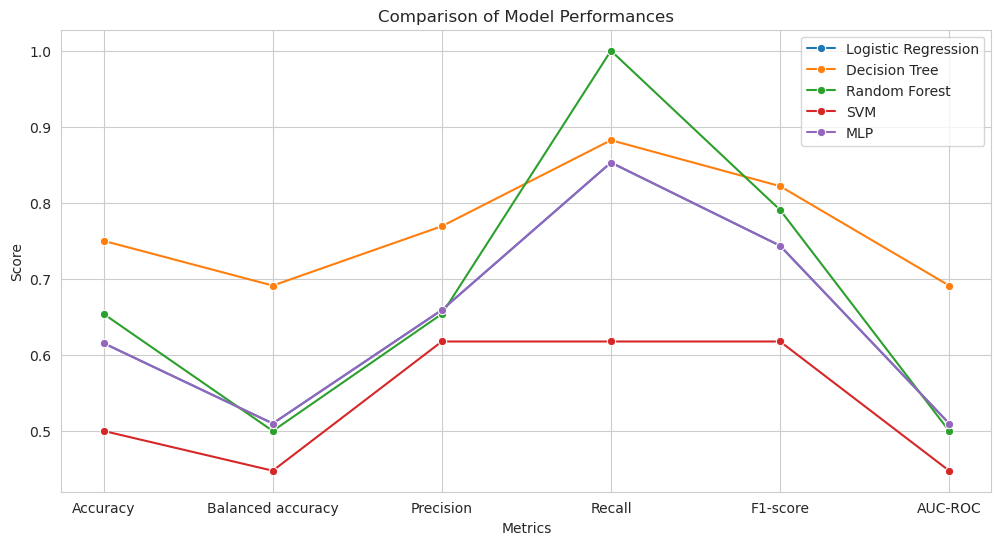

TYRP1 oxidase.csv
Number of 1s in the label column: 160


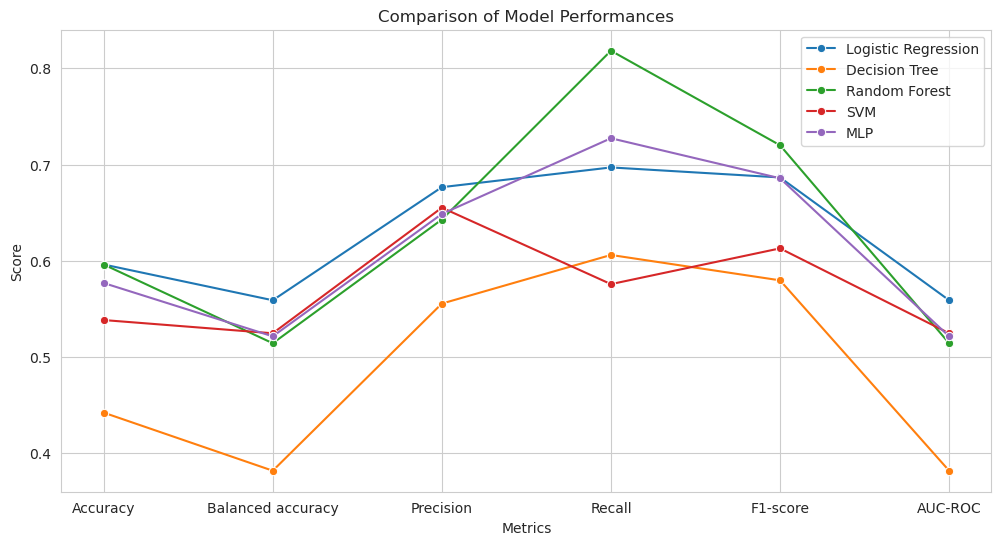

ASIP protein.csv
Number of 1s in the label column: 175


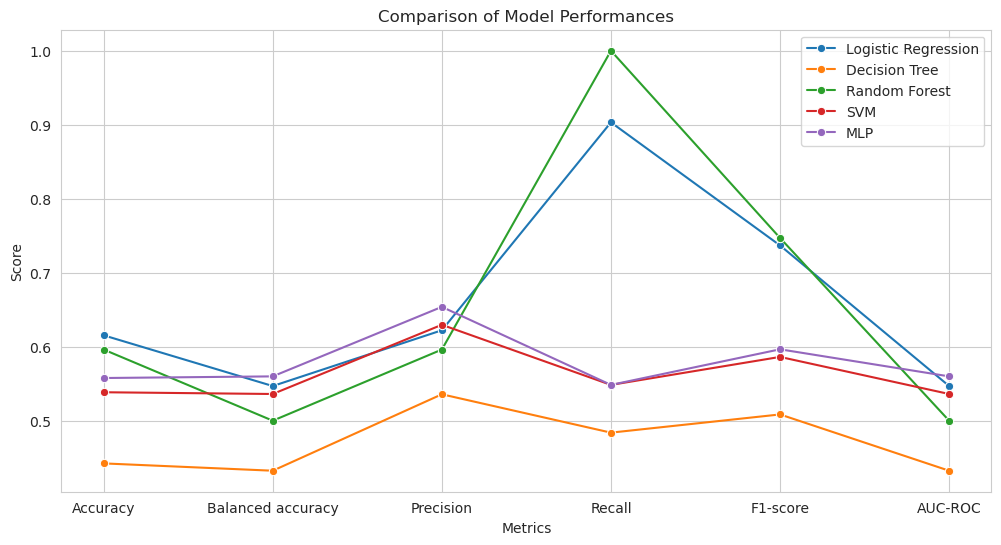

GPM6B protein.csv
Number of 1s in the label column: 208


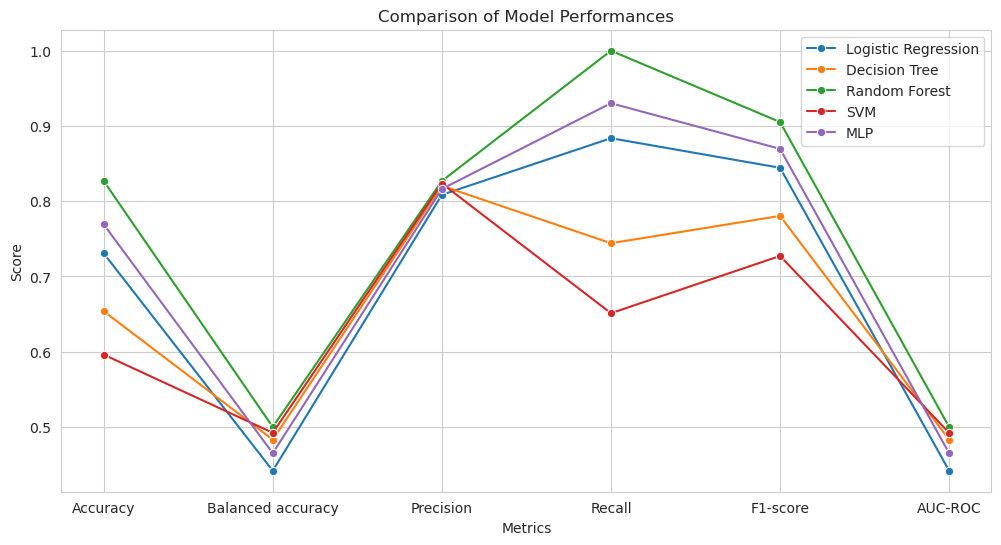

ATP7B ATPase.csv
Number of 1s in the label column: 207


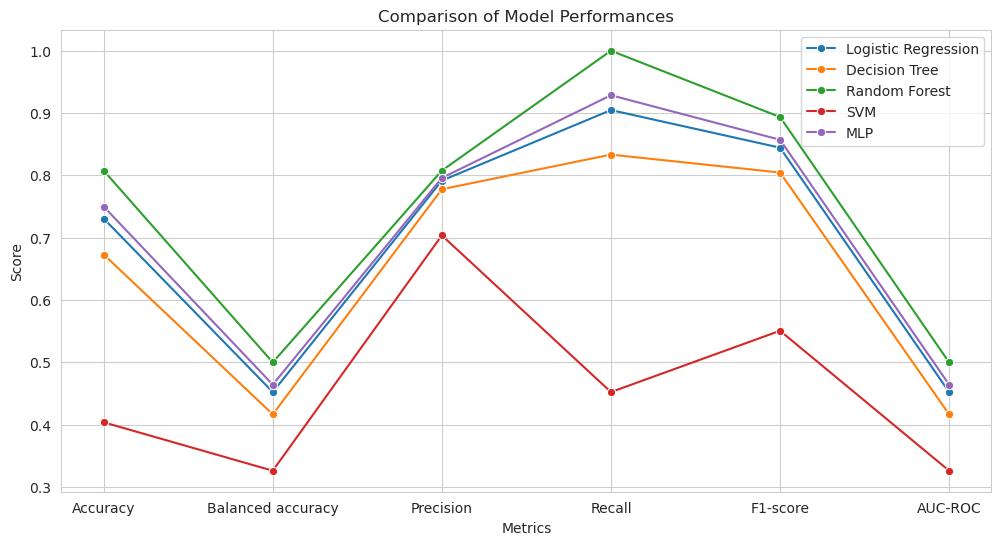

WNT5A protein.csv
Number of 1s in the label column: 189


/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


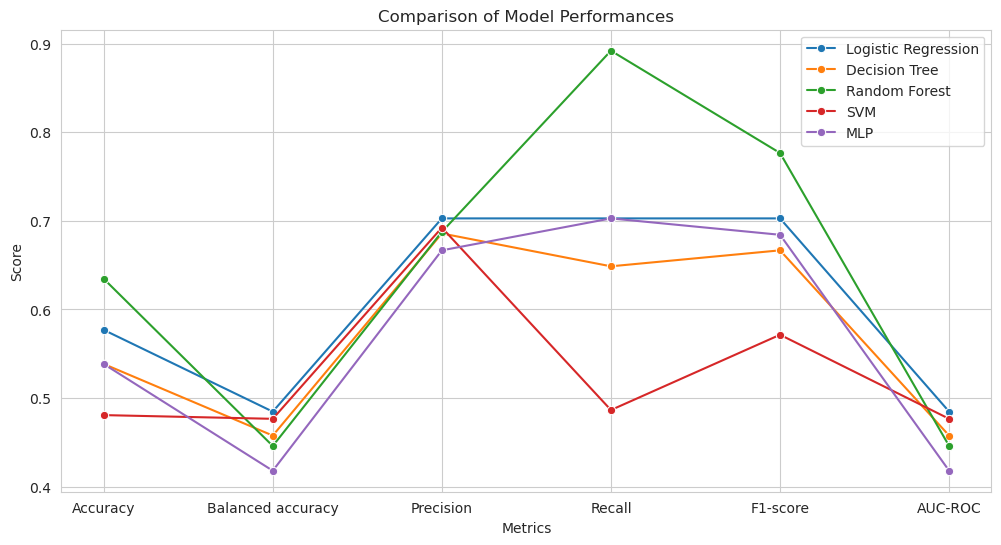

CASP3 protein.csv
Number of 1s in the label column: 212


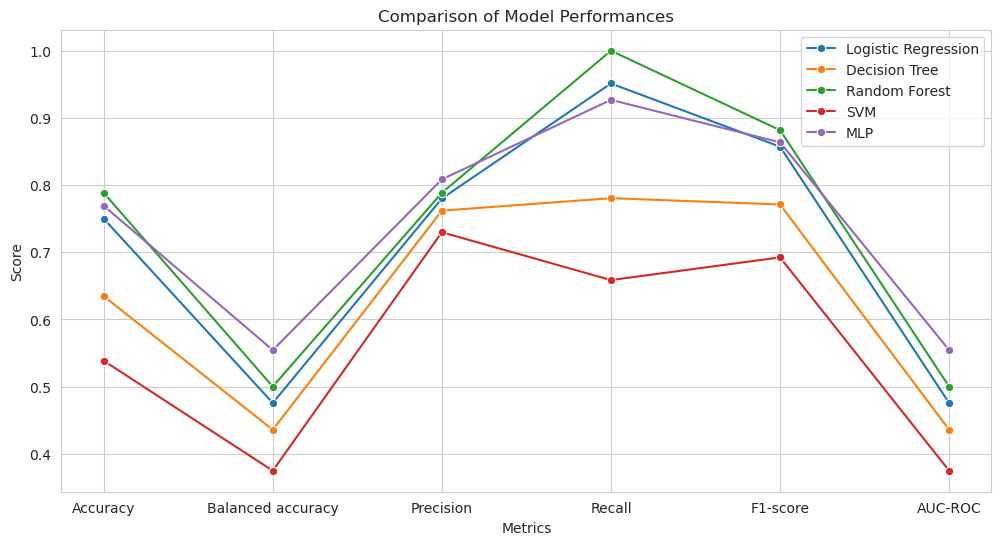

NDP protein.csv
Number of 1s in the label column: 205


/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


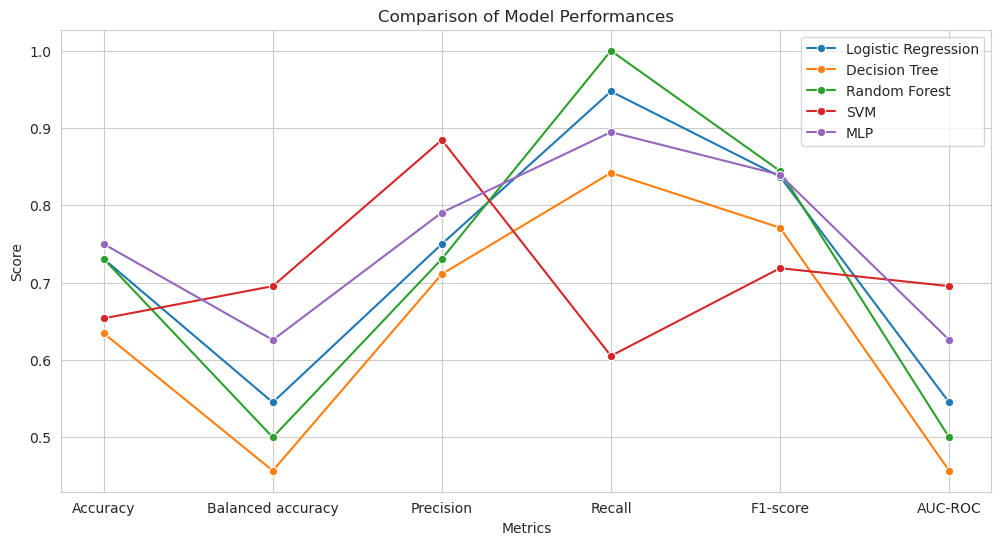

RAB38 protein.csv
Number of 1s in the label column: 184


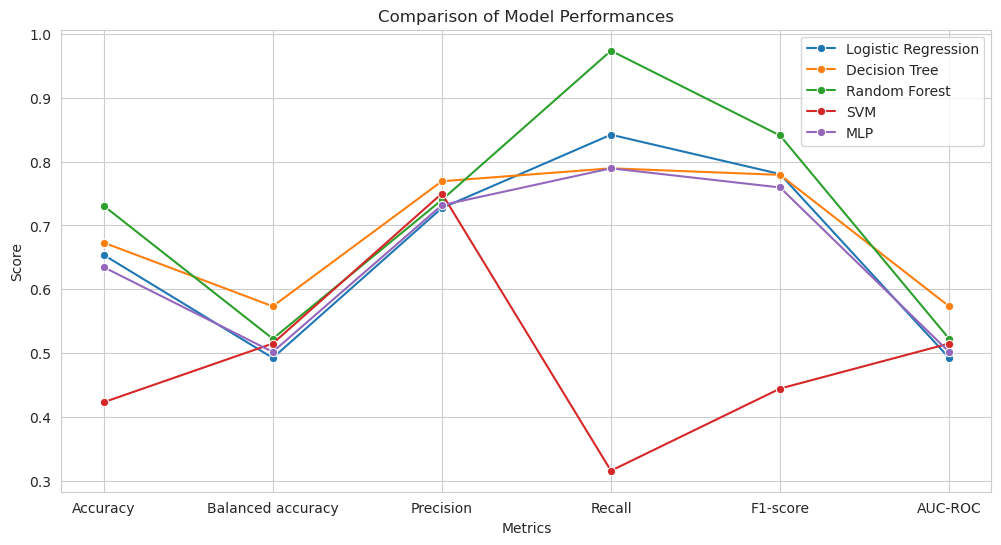

TCF7 factor.csv
Number of 1s in the label column: 32


/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


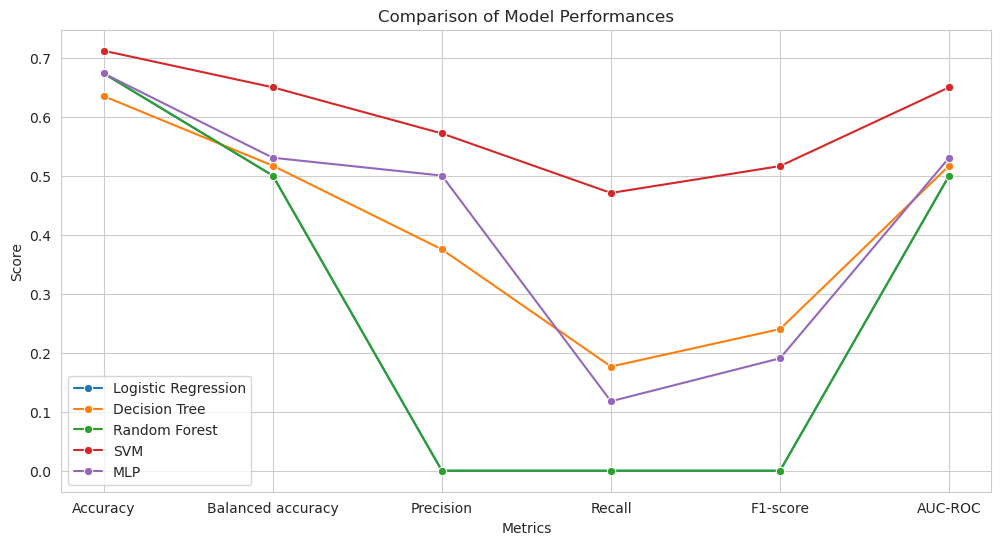

JMJD6 hydroxylase.csv
Number of 1s in the label column: 188


/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


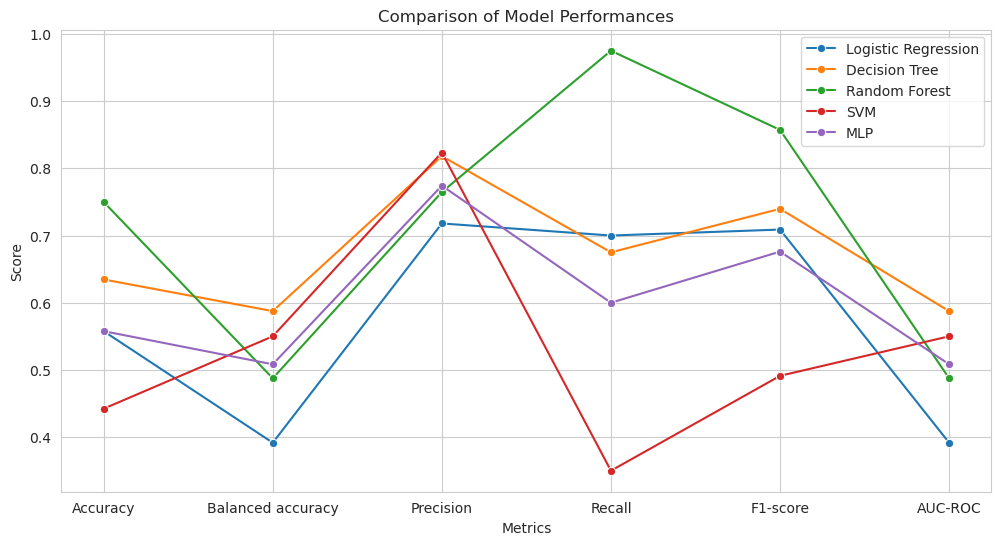

WNT7B protein.csv
Number of 1s in the label column: 195


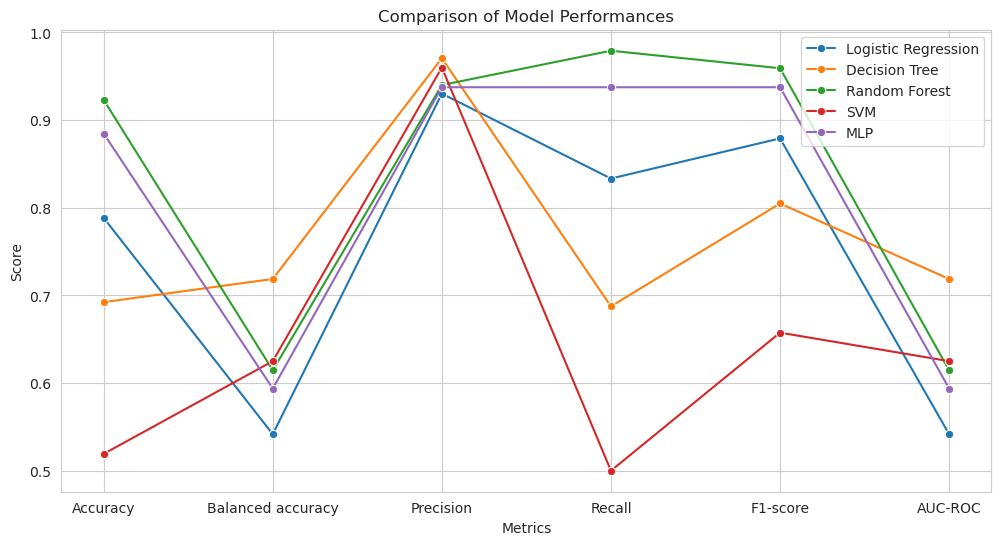

CRHBP protein.csv
Number of 1s in the label column: 171


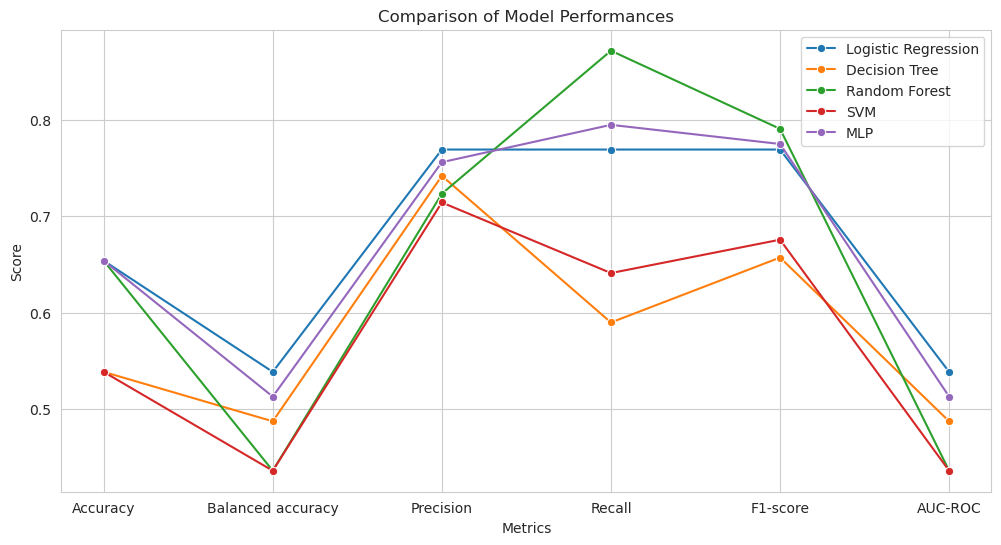

FABP7 protein.csv
Number of 1s in the label column: 199


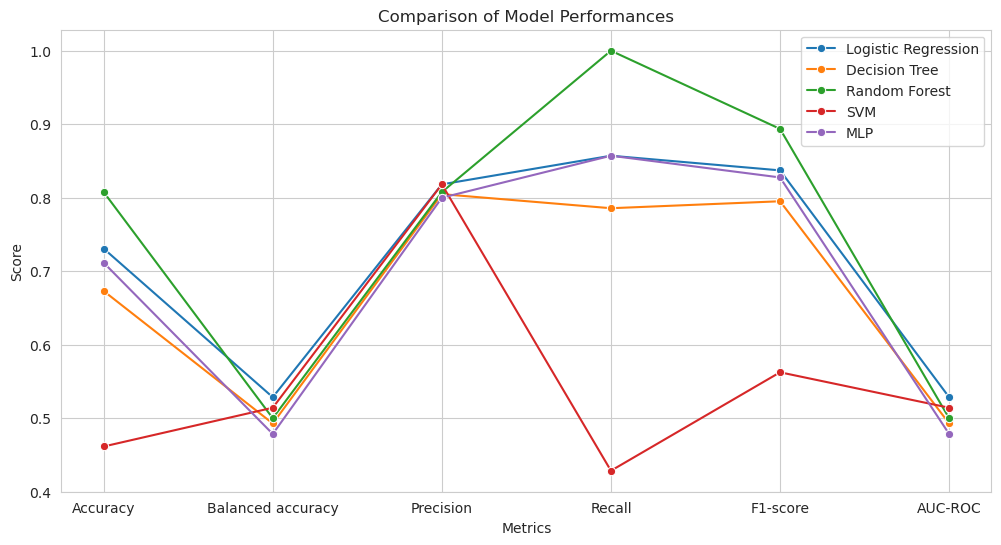

In [19]:
# Set the paths for the data folder
data_folder = "data"

# Get the list of CSV files in the data folder
csv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]

for csv_file in csv_files:
    # Read the CSV file
    csv_path = os.path.join(data_folder, csv_file)
    df = pd.read_csv(csv_path)

    # Get the feature columns by excluding the label column
    feature_columns = df.columns[df.columns != 'label']

    # Perform the data analysis and model training
    count_ones = df['label'].value_counts().get(1, 0)
    print(csv_file)
    print("Number of 1s in the label column:", count_ones)

    features = df[feature_columns]
    target = df['label']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=2000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(class_weight='balanced'),
        'MLP': MLPClassifier(hidden_layer_sizes=(256, 128), activation='relu', random_state=42)
    }

    trained_models = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[model_name] = model

    results = {}
    metrics = {
        'Accuracy': accuracy_score,
        'Balanced accuracy': balanced_accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1-score': f1_score,
        'AUC-ROC': roc_auc_score
    }

    for model_name, model in trained_models.items():
        y_pred = model.predict(X_test)
        model_metrics = {}
        for metric_name, metric_func in metrics.items():
            score = metric_func(y_test, y_pred)
            model_metrics[metric_name] = score
        results[model_name] = model_metrics

    metrics_names = list(metrics.keys())
    model_names = list(results.keys())

    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    for model_name in model_names:
        scores = list(results[model_name].values())
        sns.lineplot(x=metrics_names, y=scores, marker='o', label=model_name)

    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Comparison of Model Performances')
    plt.legend()
    plt.show()


/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye

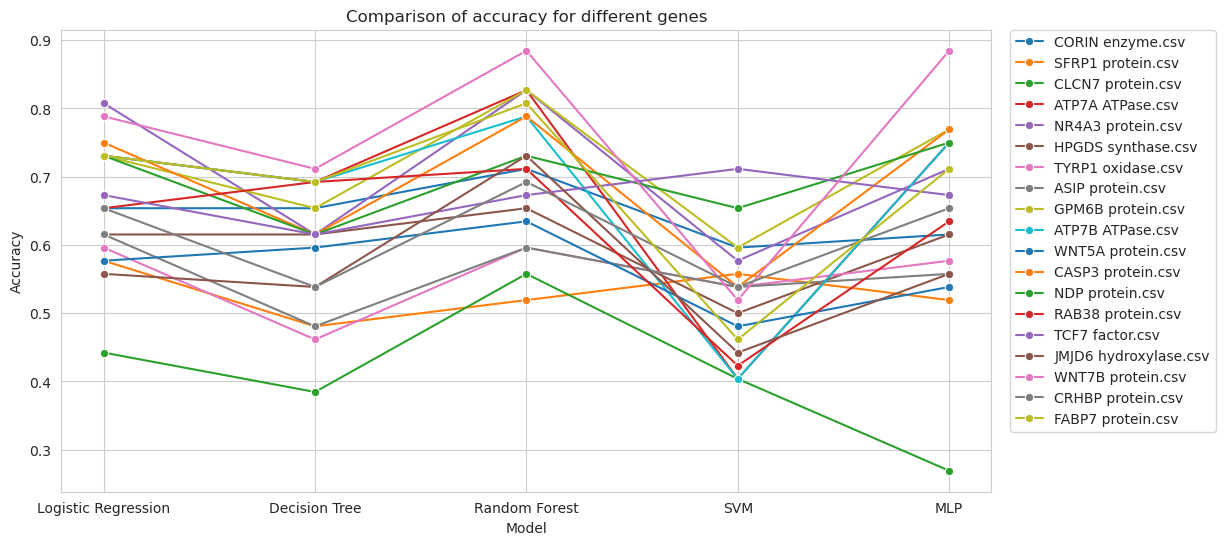

In [21]:
accuracy_scores = {}

for csv_file in csv_files:
    # Read the CSV file
    csv_path = os.path.join(data_folder, csv_file)
    df = pd.read_csv(csv_path)

    # Get the feature columns by excluding the label column
    feature_columns = df.columns[df.columns != 'label']

    features = df[feature_columns]
    target = df['label']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=2000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(class_weight='balanced'),
        'MLP': MLPClassifier(hidden_layer_sizes=(256, 128), activation='relu', random_state=42)
    }

    model_accuracies = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        model_accuracies[model_name] = accuracy

    accuracy_scores[csv_file] = model_accuracies

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

for gene, accuracies in accuracy_scores.items():
    model_names = list(accuracies.keys())
    accuracy_values = list(accuracies.values())

    sns.lineplot(x=model_names, y=accuracy_values, marker='o', label=gene)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of accuracy for different genes')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/modules/i12g/anaconda/envs/ml4rg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye

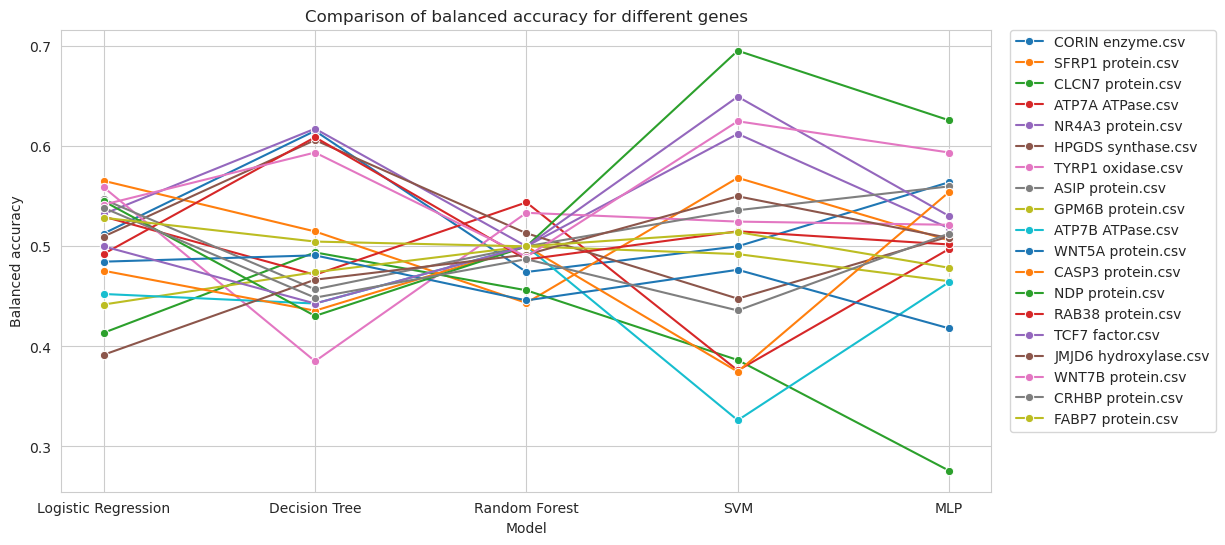

In [20]:
accuracy_scores = {}

for csv_file in csv_files:
    # Read the CSV file
    csv_path = os.path.join(data_folder, csv_file)
    df = pd.read_csv(csv_path)

    # Get the feature columns by excluding the label column
    feature_columns = df.columns[df.columns != 'label']

    features = df[feature_columns]
    target = df['label']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=2000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(class_weight='balanced'),
        'MLP': MLPClassifier(hidden_layer_sizes=(256, 128), activation='relu', random_state=42)
    }

    model_accuracies = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = balanced_accuracy_score(y_test, y_pred)
        model_accuracies[model_name] = accuracy

    accuracy_scores[csv_file] = model_accuracies

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

for gene, accuracies in accuracy_scores.items():
    model_names = list(accuracies.keys())
    accuracy_values = list(accuracies.values())

    sns.lineplot(x=model_names, y=accuracy_values, marker='o', label=gene)

plt.xlabel('Model')
plt.ylabel('Balanced accuracy')
plt.title('Comparison of balanced accuracy for different genes')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
